In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
from sklearn.feature_extraction import DictVectorizer
import csv
from sklearn import tree
from sklearn import preprocessing
from sklearn.externals.six import StringIO
import pandas,pprint
import graphviz 
import numpy as np

# Read in the csv file and put features into list of dict and lis of class label
allElectronicsData = open('AllElectronics.csv', 'r')
reader = csv.reader(allElectronicsData)
headers = next(reader)

print(headers)

featureList = []
labelList = []

for row in reader:
    labelList.append(row[len(row)-1]) # 取得每一行最後一個值 標簽
    rowDict = {} #取得每一行的值 包含有字典的list
    for i in range(1, len(row)-1):
        rowDict[headers[i]] = row[i]
    featureList.append(rowDict)

pprint.pprint(featureList,width=100)
pprint.pprint(labelList,width=100)


['RID', 'age', 'income', 'student', 'credit_rating', 'class_buy_computer']
[{'age': 'youth', 'credit_rating': 'fair', 'income': 'high', 'student': 'no'},
 {'age': 'youth', 'credit_rating': 'excellent', 'income': 'high', 'student': 'no'},
 {'age': 'middle_aged', 'credit_rating': 'fair', 'income': 'high', 'student': 'no'},
 {'age': 'senior', 'credit_rating': 'fair', 'income': 'medium', 'student': 'no'},
 {'age': 'senior', 'credit_rating': 'fair', 'income': 'low', 'student': 'yes'},
 {'age': 'senior', 'credit_rating': 'excellent', 'income': 'low', 'student': 'yes'},
 {'age': 'middle_aged', 'credit_rating': 'excellent', 'income': 'low', 'student': 'yes'},
 {'age': 'youth', 'credit_rating': 'fair', 'income': 'medium', 'student': 'no'},
 {'age': 'youth', 'credit_rating': 'fair', 'income': 'low', 'student': 'yes'},
 {'age': 'senior', 'credit_rating': 'fair', 'income': 'medium', 'student': 'yes'},
 {'age': 'youth', 'credit_rating': 'excellent', 'income': 'medium', 'student': 'yes'},
 {'age': '

In [2]:
# Vetorize features
vec = DictVectorizer()#將字典轉換成00100的形式（1000）
dummyX = vec.fit_transform(featureList).toarray()
pprint.pprint(dummyX)
pprint.pprint(vec.get_feature_names())
pprint.pprint("labelList: " + str(labelList))

array([[0., 0., 1., 0., 1., 1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0., 1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1., 0., 1., 0., 0., 1.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1., 1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 0., 0., 1., 1., 0.]])
['age=middle_aged',
 'age=senior',
 'age=youth',
 'credit_rating=excellent',
 'credit_rating=fair',
 'income=high',
 'income=low',
 'income=medium',
 'student=no',
 'student=yes']
("labelList: ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', "
 "'yes', 'yes', 'yes', 'yes', 'no']")


In [3]:
# vectorize class labels
lb = preprocessing.LabelBinarizer()#將標簽轉換成0,1
dummyY = lb.fit_transform(labelList)
pprint.pprint(dummyY)
pprint.pprint(lb.get_params())

array([[0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])
{'neg_label': 0, 'pos_label': 1, 'sparse_output': False}


In [4]:
# Using decision tree for classification
# clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion='entropy')#信息熵
clf = clf.fit(dummyX, dummyY)
print("clf: " + str(clf))

clf: DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


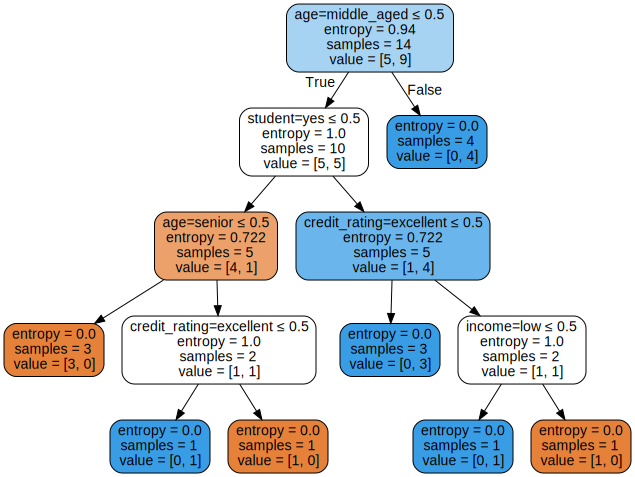

In [5]:

dot_data = tree.export_graphviz(clf, out_file=None,feature_names=vec.get_feature_names(),  
                         
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
# graph.render("iris") 
graph

In [6]:
# # Visualize model
# with open("iris.dot", 'w') as f:
#     f = tree.export_graphviz(clf, feature_names=vec.get_feature_names(), out_file=f)

In [7]:
# 複製dummyX第一條, 把youth 改成 middleage
oneRowX = dummyX[0, :]
print("oneRowX: " + str(oneRowX))

newRowX = oneRowX
newRowX[0] = 1
newRowX[2] = 0
print("newRowX: " + str(newRowX))

predictedY = clf.predict(np.array(newRowX).reshape(1, -1))
print("predictedY: " + str(predictedY))

oneRowX: [0. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
newRowX: [1. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
predictedY: [1]
